 Imports

In [1]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler, normalize
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.model_selection import GridSearchCV,KFold
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.naive_bayes import MultinomialNB
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,make_scorer,fbeta_score

Using TensorFlow backend.


In [2]:
uploaded = files.upload()

Saving dopo_eda.csv to dopo_eda (1).csv


In [3]:
df = pd.read_csv("/content/dopo_eda.csv")
df.head()

,Unnamed: 0,text,label
0,0,econom recoveri nation climat pledg must desig...,0.0
1,1,difficult time it’ hard connect natur world ea...,0.0
2,2,decis postpon cop unavoid collect prioriti mus...,0.0
3,3,japan world’ fifth largest emitt greenhous gas...,0.0
4,4,countri includ naturebasedsolut climat plan nd...,0.0


In [4]:
df.drop("Unnamed: 0", axis = 1,inplace = True)
df.head()

,text,label
0,econom recoveri nation climat pledg must desig...,0.0
1,difficult time it’ hard connect natur world ea...,0.0
2,decis postpon cop unavoid collect prioriti mus...,0.0
3,japan world’ fifth largest emitt greenhous gas...,0.0
4,countri includ naturebasedsolut climat plan nd...,0.0


In [5]:
for i in range(len(df)):
    if df.label[i] != df.label[i]:
        print(df.loc[i])
        df.drop(i, inplace = True)

text     billion upon billion hard earn tax dollar spen...
label                                                  NaN
Name: 18007, dtype: object


# One-Hot Encoding (Count Vectorizing)

In [6]:
plot_ = defaultdict()
scaler = MaxAbsScaler()
vectorizer = CountVectorizer()
test_size_range = [0.25, 0.30, 0.35, 0.40]
cv_range = [5, 10, 15, 20]
for i in range(4):
    for j in range(4):
        X_train, X_test, y_train, y_test = train_test_split(list(df.text),list(df.label),test_size=test_size_range[i], shuffle = True)
        vectorizer = CountVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        param_grid = {}
        kfcv = KFold(n_splits=cv_range[j],shuffle=True,random_state=101) #<--- 5-fold cross-validation
        clf = MultinomialNB()
        grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                           cv=kfcv,n_jobs = -1, verbose =2, scoring='accuracy')
        grid_search.fit(X_train,y_train)
        best_grid = grid_search.best_estimator_
        best_params = best_grid.get_params()
        print( " For test size = ", test_size_range[i], " and number of folds ", cv_range[j])
        print()
        print('The score: {}'.format(round(grid_search.best_score_,4)))
        print()
        print("Test set score : {:.3f}".format(accuracy_score(best_grid.predict(X_test), y_test)))
        print()
        print('CLASSFICATION_REPORT')
        print()
        print(classification_report(y_test,best_grid.predict(X_test)))
        print()
        plot_[(i,j)] = roc_curve(y_test, best_grid.predict(X_test))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


 For test size =  0.25  and number of folds  5

The score: 0.9058

Test set score : 0.910

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1821
         1.0       0.93      0.92      0.92      2681

    accuracy                           0.91      4502
   macro avg       0.91      0.91      0.91      4502
weighted avg       0.91      0.91      0.91      4502


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


 For test size =  0.25  and number of folds  10

The score: 0.9076

Test set score : 0.904

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      1829
         1.0       0.92      0.92      0.92      2673

    accuracy                           0.90      4502
   macro avg       0.90      0.90      0.90      4502
weighted avg       0.90      0.90      0.90      4502


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished


 For test size =  0.25  and number of folds  15

The score: 0.9103

Test set score : 0.907

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1858
         1.0       0.92      0.92      0.92      2644

    accuracy                           0.91      4502
   macro avg       0.90      0.90      0.90      4502
weighted avg       0.91      0.91      0.91      4502


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.5s finished


 For test size =  0.25  and number of folds  20

The score: 0.906

Test set score : 0.905

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      1865
         1.0       0.92      0.92      0.92      2637

    accuracy                           0.90      4502
   macro avg       0.90      0.90      0.90      4502
weighted avg       0.90      0.90      0.90      4502


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


 For test size =  0.3  and number of folds  5

The score: 0.9039

Test set score : 0.910

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      2233
         1.0       0.92      0.93      0.92      3170

    accuracy                           0.91      5403
   macro avg       0.91      0.91      0.91      5403
weighted avg       0.91      0.91      0.91      5403


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


 For test size =  0.3  and number of folds  10

The score: 0.9078

Test set score : 0.916

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      2200
         1.0       0.93      0.93      0.93      3203

    accuracy                           0.92      5403
   macro avg       0.91      0.91      0.91      5403
weighted avg       0.92      0.92      0.92      5403


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished


 For test size =  0.3  and number of folds  15

The score: 0.9075

Test set score : 0.913

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      2240
         1.0       0.92      0.93      0.93      3163

    accuracy                           0.91      5403
   macro avg       0.91      0.91      0.91      5403
weighted avg       0.91      0.91      0.91      5403


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.5s finished


 For test size =  0.3  and number of folds  20

The score: 0.9085

Test set score : 0.908

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      2249
         1.0       0.91      0.93      0.92      3154

    accuracy                           0.91      5403
   macro avg       0.91      0.90      0.90      5403
weighted avg       0.91      0.91      0.91      5403


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


 For test size =  0.35  and number of folds  5

The score: 0.9022

Test set score : 0.905

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      2598
         1.0       0.92      0.92      0.92      3705

    accuracy                           0.91      6303
   macro avg       0.90      0.90      0.90      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


 For test size =  0.35  and number of folds  10

The score: 0.9064

Test set score : 0.903

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      2605
         1.0       0.91      0.92      0.92      3698

    accuracy                           0.90      6303
   macro avg       0.90      0.90      0.90      6303
weighted avg       0.90      0.90      0.90      6303


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished


 For test size =  0.35  and number of folds  15

The score: 0.9079

Test set score : 0.898

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      2626
         1.0       0.91      0.91      0.91      3677

    accuracy                           0.90      6303
   macro avg       0.90      0.90      0.90      6303
weighted avg       0.90      0.90      0.90      6303


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished


 For test size =  0.35  and number of folds  20

The score: 0.9058

Test set score : 0.907

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      2616
         1.0       0.92      0.92      0.92      3687

    accuracy                           0.91      6303
   macro avg       0.90      0.90      0.90      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


 For test size =  0.4  and number of folds  5

The score: 0.9041

Test set score : 0.901

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      2936
         1.0       0.92      0.91      0.92      4267

    accuracy                           0.90      7203
   macro avg       0.90      0.90      0.90      7203
weighted avg       0.90      0.90      0.90      7203


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


 For test size =  0.4  and number of folds  10

The score: 0.9095

Test set score : 0.904

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      2931
         1.0       0.92      0.92      0.92      4272

    accuracy                           0.90      7203
   macro avg       0.90      0.90      0.90      7203
weighted avg       0.90      0.90      0.90      7203


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished


 For test size =  0.4  and number of folds  15

The score: 0.904

Test set score : 0.906

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      2941
         1.0       0.92      0.92      0.92      4262

    accuracy                           0.91      7203
   macro avg       0.90      0.90      0.90      7203
weighted avg       0.91      0.91      0.91      7203


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


 For test size =  0.4  and number of folds  20

The score: 0.9064

Test set score : 0.905

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      2989
         1.0       0.92      0.92      0.92      4214

    accuracy                           0.91      7203
   macro avg       0.90      0.90      0.90      7203
weighted avg       0.91      0.91      0.91      7203




[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished


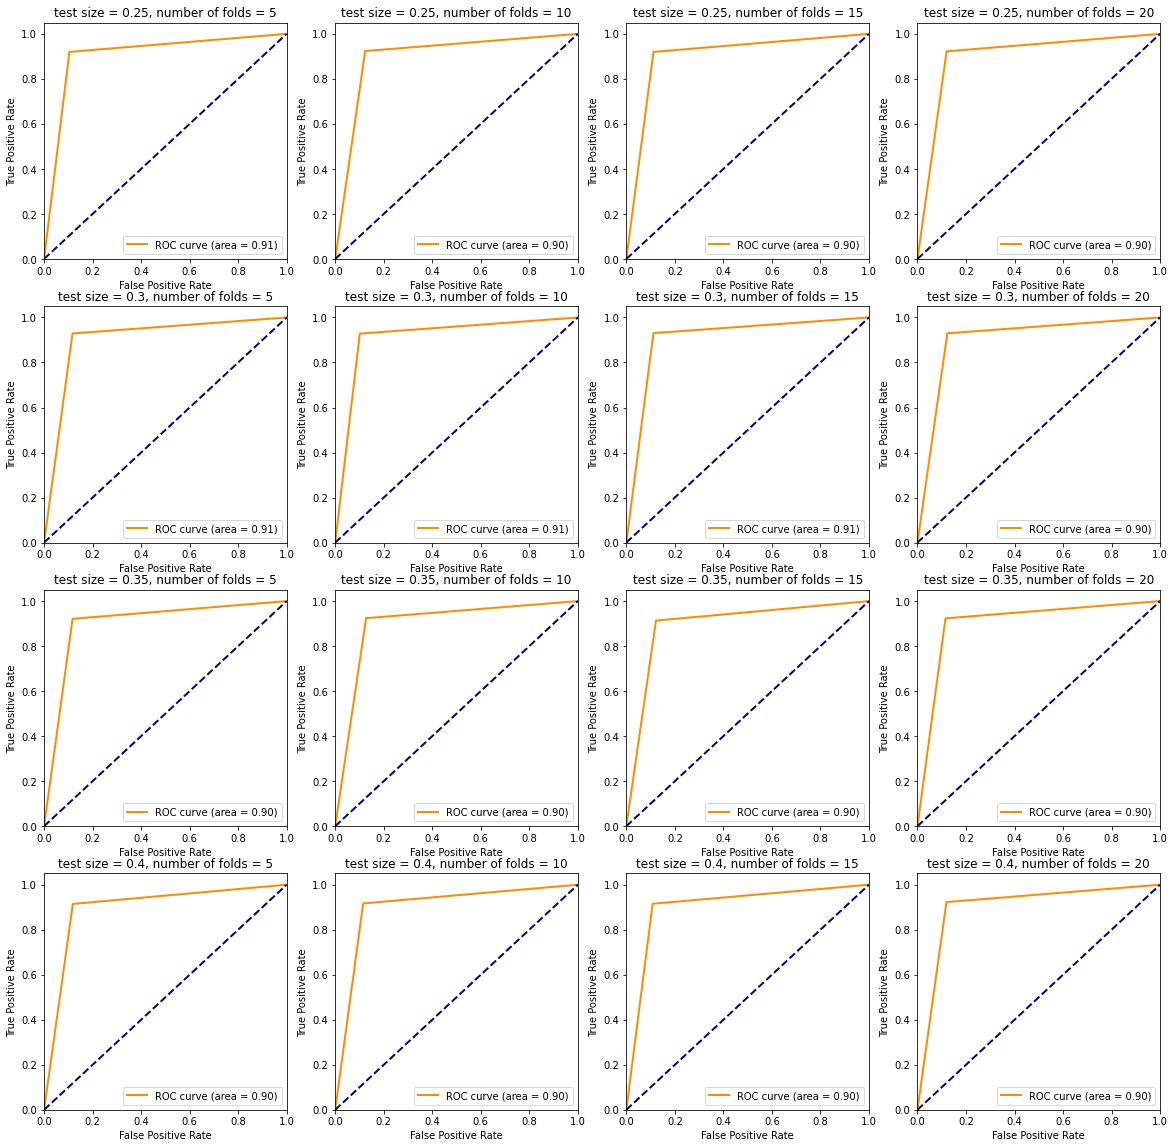

In [7]:
f, axes = plt.subplots(4,4,figsize=(20,20))
for i in range(4):
    for j in range(4):
        fpr, tpr, _ = plot_[(i,j)]
        roc_auc = auc(fpr, tpr)
        lw = 2
        axes[i][j].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        axes[i][j].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        axes[i][j].set_xlim([0.0, 1.0])
        axes[i][j].set_ylim([0.0, 1.05])
        axes[i][j].set_xlabel('False Positive Rate')
        axes[i][j].set_ylabel('True Positive Rate')
        axes[i][j].set_title("test size = {}, number of folds = {}".format(test_size_range[i],cv_range[j]))
        axes[i][j].legend(loc="lower right")
plt.show()

# TF-IDF Transform

In [8]:
from collections import defaultdict
plot_ = defaultdict()
scaler = MaxAbsScaler()
vectorizer = CountVectorizer()
test_size_range = [0.25, 0.30, 0.35, 0.40]
cv_range = [5, 10, 15, 20]
for i in range(4):
    for j in range(4):
        X_train, X_test, y_train, y_test = train_test_split(list(df.text),list(df.label),test_size=test_size_range[i], shuffle = True)
        vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        param_grid = {}
        kfcv = KFold(n_splits=cv_range[j],shuffle=True,random_state=101) #<--- 5-fold cross-validation
        clf = MultinomialNB()
        grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                           cv=kfcv,n_jobs = -1, verbose =2, scoring='accuracy')
        grid_search.fit(X_train,y_train)
        best_grid = grid_search.best_estimator_
        best_params = best_grid.get_params()
        print( " For test size = ", test_size_range[i], " and number of folds ", cv_range[j])
        print()
        print('The score: {}'.format(round(grid_search.best_score_,4)))
        print()
        print("Test set score : {:.3f}".format(accuracy_score(best_grid.predict(X_test), y_test)))
        print()
        print('CLASSFICATION_REPORT')
        print()
        print(classification_report(y_test,best_grid.predict(X_test)))
        print()
        plot_[(i,j)] = roc_curve(y_test, best_grid.predict(X_test))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


 For test size =  0.25  and number of folds  5

The score: 0.9091

Test set score : 0.909

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      1893
         1.0       0.91      0.93      0.92      2609

    accuracy                           0.91      4502
   macro avg       0.91      0.90      0.91      4502
weighted avg       0.91      0.91      0.91      4502


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


 For test size =  0.25  and number of folds  10

The score: 0.9091

Test set score : 0.911

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1872
         1.0       0.92      0.92      0.92      2630

    accuracy                           0.91      4502
   macro avg       0.91      0.91      0.91      4502
weighted avg       0.91      0.91      0.91      4502


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished


 For test size =  0.25  and number of folds  15

The score: 0.9106

Test set score : 0.911

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1775
         1.0       0.93      0.92      0.93      2727

    accuracy                           0.91      4502
   macro avg       0.91      0.91      0.91      4502
weighted avg       0.91      0.91      0.91      4502


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.6s finished


 For test size =  0.25  and number of folds  20

The score: 0.9102

Test set score : 0.910

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      1899
         1.0       0.91      0.93      0.92      2603

    accuracy                           0.91      4502
   macro avg       0.91      0.91      0.91      4502
weighted avg       0.91      0.91      0.91      4502


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


 For test size =  0.3  and number of folds  5

The score: 0.9071

Test set score : 0.905

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      2246
         1.0       0.91      0.93      0.92      3157

    accuracy                           0.90      5403
   macro avg       0.90      0.90      0.90      5403
weighted avg       0.90      0.90      0.90      5403


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


 For test size =  0.3  and number of folds  10

The score: 0.9096

Test set score : 0.906

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2273
         1.0       0.92      0.92      0.92      3130

    accuracy                           0.91      5403
   macro avg       0.90      0.90      0.90      5403
weighted avg       0.91      0.91      0.91      5403


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished


 For test size =  0.3  and number of folds  15

The score: 0.9074

Test set score : 0.906

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2269
         1.0       0.92      0.92      0.92      3134

    accuracy                           0.91      5403
   macro avg       0.90      0.90      0.90      5403
weighted avg       0.91      0.91      0.91      5403


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.5s finished


 For test size =  0.3  and number of folds  20

The score: 0.9077

Test set score : 0.909

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2206
         1.0       0.92      0.92      0.92      3197

    accuracy                           0.91      5403
   macro avg       0.91      0.91      0.91      5403
weighted avg       0.91      0.91      0.91      5403


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


 For test size =  0.35  and number of folds  5

The score: 0.9052

Test set score : 0.909

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      2587
         1.0       0.92      0.92      0.92      3716

    accuracy                           0.91      6303
   macro avg       0.91      0.91      0.91      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


 For test size =  0.35  and number of folds  10

The score: 0.9079

Test set score : 0.907

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      2571
         1.0       0.92      0.92      0.92      3732

    accuracy                           0.91      6303
   macro avg       0.90      0.90      0.90      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished


 For test size =  0.35  and number of folds  15

The score: 0.9089

Test set score : 0.904

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      2618
         1.0       0.91      0.93      0.92      3685

    accuracy                           0.90      6303
   macro avg       0.90      0.90      0.90      6303
weighted avg       0.90      0.90      0.90      6303


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.5s finished


 For test size =  0.35  and number of folds  20

The score: 0.9076

Test set score : 0.904

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      2581
         1.0       0.91      0.92      0.92      3722

    accuracy                           0.90      6303
   macro avg       0.90      0.90      0.90      6303
weighted avg       0.90      0.90      0.90      6303


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


 For test size =  0.4  and number of folds  5

The score: 0.9043

Test set score : 0.899

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      3018
         1.0       0.91      0.91      0.91      4185

    accuracy                           0.90      7203
   macro avg       0.90      0.90      0.90      7203
weighted avg       0.90      0.90      0.90      7203


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


 For test size =  0.4  and number of folds  10

The score: 0.9061

Test set score : 0.906

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      3007
         1.0       0.92      0.92      0.92      4196

    accuracy                           0.91      7203
   macro avg       0.90      0.90      0.90      7203
weighted avg       0.91      0.91      0.91      7203


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.4s finished


 For test size =  0.4  and number of folds  15

The score: 0.9076

Test set score : 0.906

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      2970
         1.0       0.92      0.92      0.92      4233

    accuracy                           0.91      7203
   macro avg       0.90      0.90      0.90      7203
weighted avg       0.91      0.91      0.91      7203


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


 For test size =  0.4  and number of folds  20

The score: 0.9056

Test set score : 0.907

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      2937
         1.0       0.92      0.92      0.92      4266

    accuracy                           0.91      7203
   macro avg       0.90      0.90      0.90      7203
weighted avg       0.91      0.91      0.91      7203




[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.4s finished


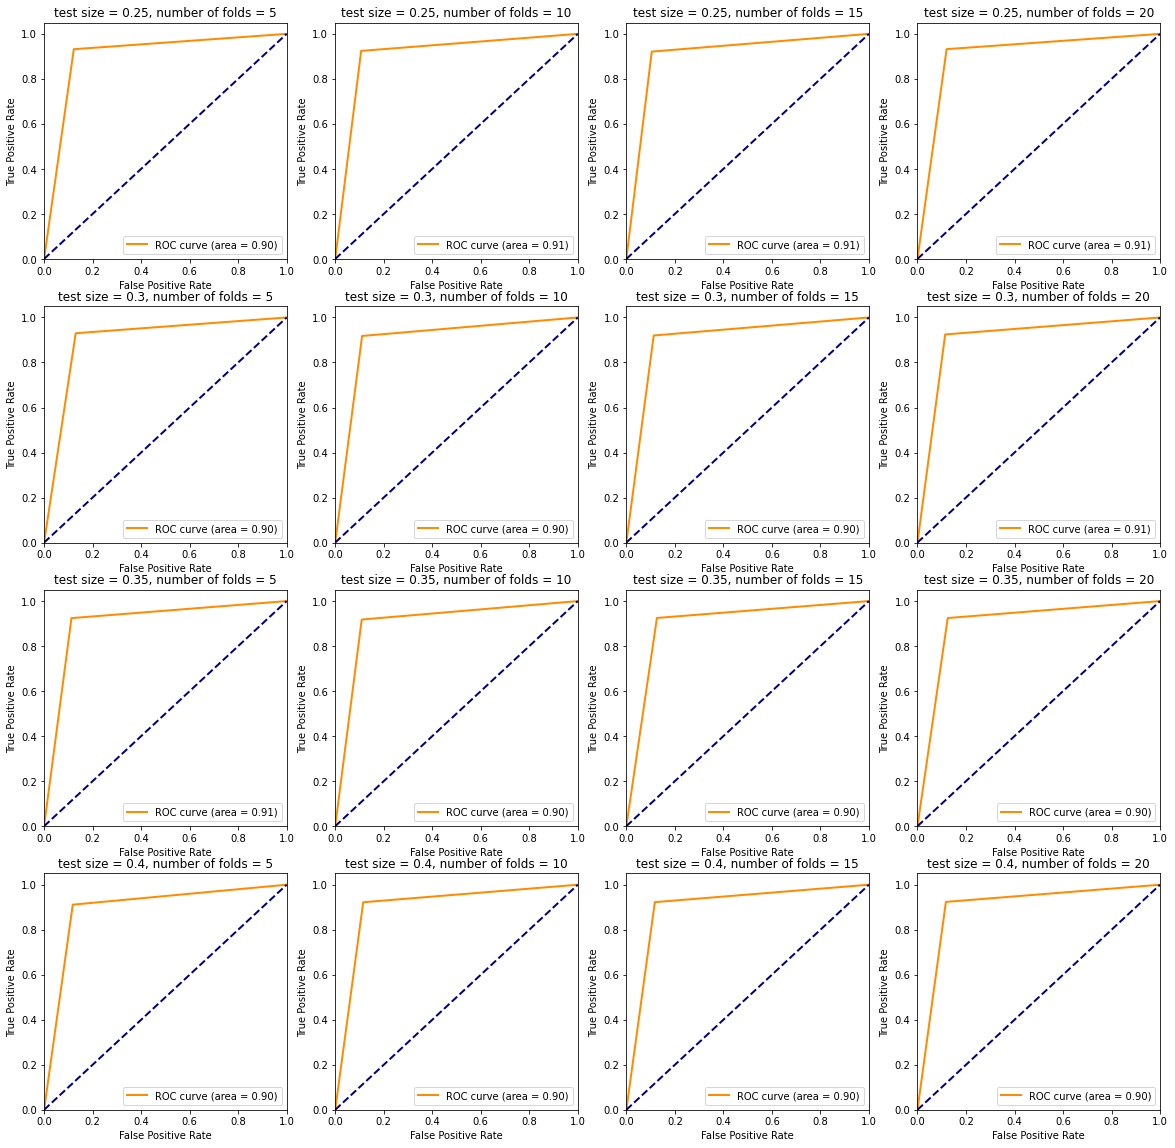

In [9]:
f, axes = plt.subplots(4,4,figsize=(20,20))
for i in range(4):
    for j in range(4):
        fpr, tpr, _ = plot_[(i,j)]
        roc_auc = auc(fpr, tpr)
        lw = 2
        axes[i][j].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        axes[i][j].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        axes[i][j].set_xlim([0.0, 1.0])
        axes[i][j].set_ylim([0.0, 1.05])
        axes[i][j].set_xlabel('False Positive Rate')
        axes[i][j].set_ylabel('True Positive Rate')
        axes[i][j].set_title("test size = {}, number of folds = {}".format(test_size_range[i],cv_range[j]))
        axes[i][j].legend(loc="lower right")
plt.show()